# PQL targeting

## Import

In [79]:
import pandas as pd
import csv

def import_csv(file_path):
    # Initialize an empty DataFrame
    df = pd.DataFrame()
    
    # Read CSV file into DataFrame with automatic type inference
    df = pd.read_csv(file_path)
    
    return df

# Example usage:
file_path = '/Users/patrick/Projects/growth/02_Acquisition/03_Targeting PQL/PQL data.csv'
data = import_csv(file_path)

data

,workspace_id,workspace_created_at,time_since_signup,pql_target,professional_conversion,business_email,trial_count,active_trial_flag,paid_signup,industry,...,note_count_28d,transcription_count_28d,highlight_count_28d,tag_count_28d,reel_created_count_28d,insight_count_28d,shared_object_note_count_28d,shared_object_highlight_count_28d,shared_object_tag_count_28d,shared_object_insight_count_28d
0,2d57be7c-c5bd-4fb5-9b8a-97dd8bdf140a,2022-08-18,684,1,0,1,0,0,0,Automobiles & Components,...,25,5,1134,71,1,36,1,0,0,37
1,072f3f61-3d53-4259-a614-4eadd5433343,2022-04-26,798,1,0,1,0,0,0,Health Care Equipment & Services,...,112,10,2782,269,14,31,24,0,2,38
2,27f4ac68-9a95-4160-b6b8-af6c449240de,2022-08-08,694,1,0,1,0,0,0,Software & Services,...,3,0,0,1,0,1,11,0,0,2
3,0b324b3c-7e02-4f88-b209-69091e23d327,2022-08-31,671,1,0,1,0,0,0,Software & Services,...,104,46,588,135,8,8,5,8,12,7
4,1b72dcd9-7907-4289-9426-4608a922ad6e,2023-10-10,266,1,0,1,1,0,0,Technology Hardware & Equipment,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156510,d07267b3-21ed-45f7-bdb7-e0af499c1e97,2024-01-18,166,0,0,1,1,0,0,Software & Services,...,0,0,0,0,0,0,0,0,0,0
156511,d073ae9d-ee5a-493a-97d6-e20a29e3a0db,2021-10-19,987,0,0,1,1,0,0,Media,...,0,0,0,0,0,0,0,0,0,0
156512,d074a38c-e0c3-48e4-9c68-2093e8c65c0f,2024-05-17,46,0,0,0,0,0,0,Unknown industry,...,0,0,0,0,0,0,0,0,0,0
156513,d074ea89-4ef5-4304-9c40-5104f89ec36d,2023-07-05,363,0,0,0,1,0,1,Unknown industry,...,0,0,0,0,0,0,0,0,0,0


## Clean

In [80]:
import pandas as pd

def check_data(df):
    # Check for missing values (NaNs)
    null_counts = df.isnull().sum()
    null_columns = null_counts[null_counts > 0].index.tolist()
    
    # Identify non-numeric columns
    non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()
    
    return null_columns, non_numeric_columns

# Assuming 'data' is already defined as your DataFrame
null_columns, non_numeric_columns = check_data(data)

print("Columns with Nulls or NaNs:")
print(null_columns)

print("\nNon-numeric columns:")
print(non_numeric_columns)

Columns with Nulls or NaNs:
[]

Non-numeric columns:
['workspace_id', 'workspace_created_at', 'industry']


## One-hot encoding

In [81]:
import pandas as pd

def one_hot_encode(data, variable='industry'):
    # Perform one-hot encoding with dtype=int to get 0s and 1s
    encoded_data = pd.get_dummies(data, columns=[variable], dtype=int)
    
    return encoded_data

# Example usage:
# Assuming 'data' is your DataFrame and 'industry' is a categorical variable to encode
data = one_hot_encode(data, variable='industry')

# Print the first few rows of the encoded data to verify
data

,workspace_id,workspace_created_at,time_since_signup,pql_target,professional_conversion,business_email,trial_count,active_trial_flag,paid_signup,company_employees,...,"industry_Pharmaceuticals, Biotechnology & Life Sciences",industry_Real Estate,industry_Retailing,industry_Semiconductors & Semiconductor Equipment,industry_Software & Services,industry_Technology Hardware & Equipment,industry_Telecommunication Services,industry_Transportation,industry_Unknown industry,industry_Utilities
0,2d57be7c-c5bd-4fb5-9b8a-97dd8bdf140a,2022-08-18,684,1,0,1,0,0,0,48000,...,0,0,0,0,0,0,0,0,0,0
1,072f3f61-3d53-4259-a614-4eadd5433343,2022-04-26,798,1,0,1,0,0,0,32000,...,0,0,0,0,0,0,0,0,0,0
2,27f4ac68-9a95-4160-b6b8-af6c449240de,2022-08-08,694,1,0,1,0,0,0,1300,...,0,0,0,0,1,0,0,0,0,0
3,0b324b3c-7e02-4f88-b209-69091e23d327,2022-08-31,671,1,0,1,0,0,0,6000,...,0,0,0,0,1,0,0,0,0,0
4,1b72dcd9-7907-4289-9426-4608a922ad6e,2023-10-10,266,1,0,1,1,0,0,79500,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156510,d07267b3-21ed-45f7-bdb7-e0af499c1e97,2024-01-18,166,0,0,1,1,0,0,90,...,0,0,0,0,1,0,0,0,0,0
156511,d073ae9d-ee5a-493a-97d6-e20a29e3a0db,2021-10-19,987,0,0,1,1,0,0,8000,...,0,0,0,0,0,0,0,0,0,0
156512,d074a38c-e0c3-48e4-9c68-2093e8c65c0f,2024-05-17,46,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,0,1,0
156513,d074ea89-4ef5-4304-9c40-5104f89ec36d,2023-07-05,363,0,0,0,1,0,1,10,...,0,0,0,0,0,0,0,0,1,0


## Feature selection

Top 20 features and their MI:
                            Feature        MI
0         industry_Unknown industry  0.036432
1                      deleted_flag  0.029640
3                user_manager_count  0.018156
2                    business_email  0.017940
4                       trial_count  0.015263
5                        user_count  0.012341
6                live_project_count  0.011711
7                 user_viewer_count  0.010875
8            user_contributor_count  0.010839
9                live_insight_count  0.010524
10            active_user_count_28d  0.010241
11                   note_count_28d  0.007030
12                project_count_28d  0.006889
13                    tag_count_28d  0.006686
14              highlight_count_28d  0.006634
15                insight_count_28d  0.006243
16  shared_object_insight_count_28d  0.005463
17     shared_object_note_count_28d  0.005344
18          transcription_count_28d  0.004953
19                      paid_signup  0.004877


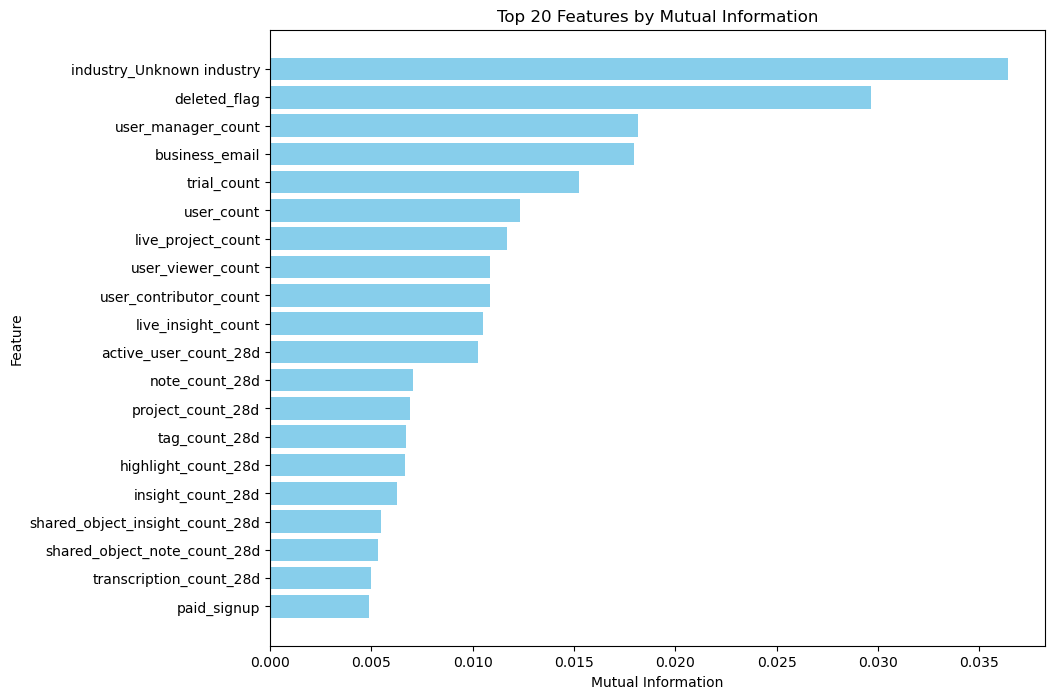


Updated 'data' DataFrame with only top 20 features:
        pql_target  industry_Unknown industry  deleted_flag  \
0                1                          0             0   
1                1                          0             0   
2                1                          0             0   
3                1                          0             0   
4                1                          0             0   
...            ...                        ...           ...   
156510           0                          0             1   
156511           0                          0             0   
156512           0                          1             0   
156513           0                          1             1   
156514           0                          1             0   

        user_manager_count  business_email  trial_count  user_count  \
0                       12               1            0          78   
1                        3               1      

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

def feature_selection(data, target, k=20):
    # Separate features (X) and target (y)
    numeric_columns = data.select_dtypes(include=['number']).columns.tolist()
    numeric_columns.remove(target)  # Remove the target variable from numeric columns
    
    X = data[numeric_columns]
    y = data[target]
    
    # Calculate mutual information scores
    mi_scores = mutual_info_classif(X, y)
    
    # Create a DataFrame to store feature names and scores
    mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI': mi_scores})
    mi_scores_df = mi_scores_df.sort_values(by='MI', ascending=False)
    
    # Select the top k features based on mutual information
    top_features = mi_scores_df.nlargest(k, 'MI')['Feature'].tolist()
    
    # Keep only the top k features in the original data DataFrame
    data = data[[target] + top_features]  # Include target variable as well
    
    return data, top_features, mi_scores_df

# Example usage:
# Assuming 'data' is your DataFrame and 'pql_target' is your target variable
k = 20  # Set the value of k here
data, top_features, mi_scores_df = feature_selection(data, target='pql_target', k=k)

# Print top features and their MI
print(f"Top {k} features and their MI:")
print(mi_scores_df.head(k))  # Print the top k features and their MI

# Plot descending horizontal bar chart with dynamic k
plt.figure(figsize=(10, 8))
plt.barh(mi_scores_df['Feature'][:k], mi_scores_df['MI'][:k], color='skyblue')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.title(f'Top {k} Features by Mutual Information')
plt.gca().invert_yaxis()  # Invert y-axis to show highest MI at the top
plt.show()

# Display the updated 'data' DataFrame with only the top features
print(f"\nUpdated 'data' DataFrame with only top {k} features:")
print(data)

## Train

In [94]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.preprocessing import MinMaxScaler

def logistic_classifier(data, target='pql_target', ignore=['workspace_id', 'workspace_created_at'], n_splits=10, normalize=True):
    # Drop columns to ignore
    data = data.drop(ignore, axis=1, errors='ignore')
    
    # Split data into features (X) and target variable (y)
    X = data.drop(target, axis=1)
    y = data[target]
    
    # Normalize features using MinMaxScaler if normalize=True
    if normalize:
        scaler = MinMaxScaler()
        X_normalized = scaler.fit_transform(X)
    else:
        X_normalized = X  # Use original features
    
    # Initialize logistic regression model with class_weight='balanced' and solver='liblinear'
    model = LogisticRegression(max_iter=10000, class_weight='balanced', solver='liblinear')
    
    # Perform stratified k-fold cross-validation with predictions
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X_normalized, y, cv=skf)
    
    # Fit the model to get coefficients
    model.fit(X_normalized, y)
    coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_.flatten()})
    coefficients = coefficients.reindex(coefficients['Coefficient'].abs().sort_values(ascending=False).index)
    
    # Calculate precision, recall, f1 score, and support for class '1'
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, labels=[1], average='binary')
    
    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    
    # Print average scores across all folds
    print(f"Precision (for class 1, averaged across {n_splits} folds): {precision:.4f}")
    print(f"Recall (for class 1, averaged across {n_splits} folds): {recall:.4f}")
    print(f"F1 Score (for class 1, averaged across {n_splits} folds): {f1:.4f}")
    print(f"Accuracy (averaged across {n_splits} folds): {accuracy:.4f}")
    
    # Print coefficients (weights) sorted by magnitude
    print("\nCoefficients (Weights) Sorted by Magnitude:")
    for index, row in coefficients.iterrows():
        print(f"{row['Feature']}: {row['Coefficient']:.4f}")
    
    # Return metrics, coefficients, and predictions as dictionaries
    metrics = {
        'Precision (Class 1)': precision,
        'Recall (Class 1)': recall,
        'F1 Score (Class 1)': f1,
        'Accuracy': accuracy
    }
    
    predictions_df = pd.DataFrame({
        'Actual': y,
        'Predicted': y_pred,
        'Probability_Class_1': model.predict_proba(X_normalized)[:, 1]  # Probability of class 1
    })
    
    return metrics, coefficients, predictions_df

# Example usage:
# Assuming 'data' is your DataFrame containing the relevant columns
# 'pql_target', 'workspace_id', and 'workspace_created_at'
metrics, coefficients, predictions = logistic_classifier(data, target='pql_target', ignore=['workspace_id', 'workspace_created_at'], n_splits=10, normalize=False)

# Print predictions DataFrame
predictions

Precision (for class 1, averaged across 10 folds): 0.1007
Recall (for class 1, averaged across 10 folds): 0.9391
F1 Score (for class 1, averaged across 10 folds): 0.1818
Accuracy (averaged across 10 folds): 0.9743

Coefficients (Weights) Sorted by Magnitude:
paid_signup: -2.9174
business_email: 2.2107
trial_count: -1.9615
deleted_flag: -0.7949
industry_Unknown industry: -0.6719
user_manager_count: 0.5917
user_count: 0.3303
user_viewer_count: -0.3174
project_count_28d: 0.2357
shared_object_note_count_28d: -0.0930
user_contributor_count: 0.0560
live_project_count: 0.0425
active_user_count_28d: 0.0145
shared_object_insight_count_28d: 0.0140
live_insight_count: -0.0031
transcription_count_28d: 0.0028
tag_count_28d: 0.0025
note_count_28d: 0.0011
insight_count_28d: -0.0010
highlight_count_28d: -0.0000


,Actual,Predicted,Probability_Class_1
0,1,1,1.000000
1,1,1,0.999999
2,1,1,0.998595
3,1,1,1.000000
4,1,1,0.852199
...,...,...,...
156510,0,0,0.018116
156511,0,0,0.112072
156512,0,0,0.041486
156513,0,0,0.000056
